<a href="https://colab.research.google.com/github/Nandini455/Data_Mining_SNAPP/blob/main/CP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING

In [ ]:
#mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import calendar

In [ ]:
file_path = "/content/drive/My Drive/For_modeling.csv"

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
df = data.copy()

# ABOUT THE DATA

In [ ]:
# number of rows and columns in the dataset
df.shape

(9601139, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Duration    int64  
 2   Distance    int64  
 3   PLong       float64
 4   PLatd       float64
 5   DLong       float64
 6   DLatd       float64
 7   Haversine   float64
 8   Pmonth      int64  
 9   Pday        int64  
 10  Phour       int64  
 11  Pmin        int64  
 12  PDweek      int64  
 13  Dmonth      int64  
 14  Dday        int64  
 15  Dhour       int64  
 16  Dmin        int64  
 17  DDweek      int64  
 18  Temp        float64
 19  Precip      float64
 20  Wind        float64
 21  Humid       float64
 22  Solar       float64
 23  Snow        float64
 24  GroundTemp  float64
 25  Dust        float64
dtypes: float64(13), int64(13)
memory usage: 1.9 GB


In [ ]:
# column names
df.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
df.describe()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,4.923152e+06,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.841734e+06,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,2.466320e+06,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,4.921318e+06,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,7.389176e+06,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,9.830310e+06,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


# PREPROCESSING

In [ ]:
# dropping the serial number column
df = df.drop(columns='Unnamed: 0')

In [ ]:
# rounding off latitude and longitude values to consider them the same docking station when they are only a few meters apart.
df['PLong_updated'] = df['PLong'].round(2)
df['PLatd_updated'] = df['PLatd'].round(2)
df['DLong_updated'] = df['DLong'].round(2)
df['DLatd_updated'] = df['DLatd'].round(2)

In [ ]:
# assigning numbers to different docking stations instead of using actual values of longitude and latitude
station_mapping = {}
current_station = 1

for index, row in df.iterrows():
    coordinates = (row['PLong_updated'], row['PLatd_updated'])
    if coordinates not in station_mapping:
        station_mapping[coordinates] = current_station
        current_station += 1
    df.at[index, 'PStation'] = station_mapping[coordinates]

df['DStation'] = df.apply(lambda x: station_mapping.get((x['DLong_updated'], x['DLatd_updated']), None), axis=1)

df['DStation'].fillna(df['PStation'], inplace=True)

In [ ]:
print(df[['PLong_updated', 'PLatd_updated', 'PStation', 'DLong_updated', 'DLatd_updated', 'DStation']])

KeyError: ignored

In [ ]:
# counting the number of unique pickup stations
Pstation_count = df['PStation'].value_counts()
Pstation_count

In [ ]:
# counting the number of unique dropoff stations
Dstation_count = df['DStation'].value_counts()
Dstation_count

# EDA

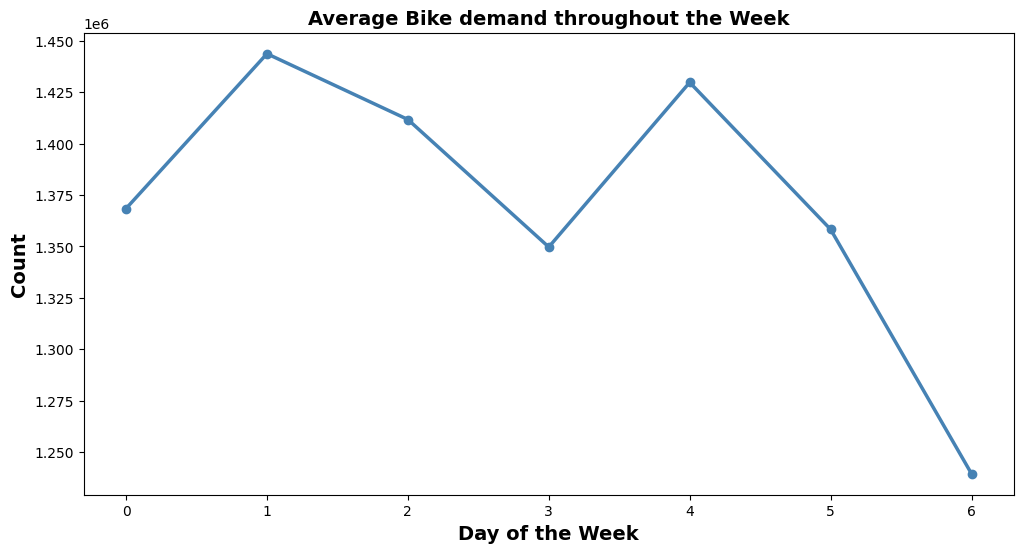

In [ ]:
# GRAPH OF AVERAGE BIKE DEMAND ON DIFFERENT DAYS OF THE WEEK

# grouping the data by days of the week
daily_counts = df.groupby('PDweek').size()

#plotting
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', marker='o', color='SteelBlue', linewidth=2.5)
plt.title('Average Bike demand throughout the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.show()


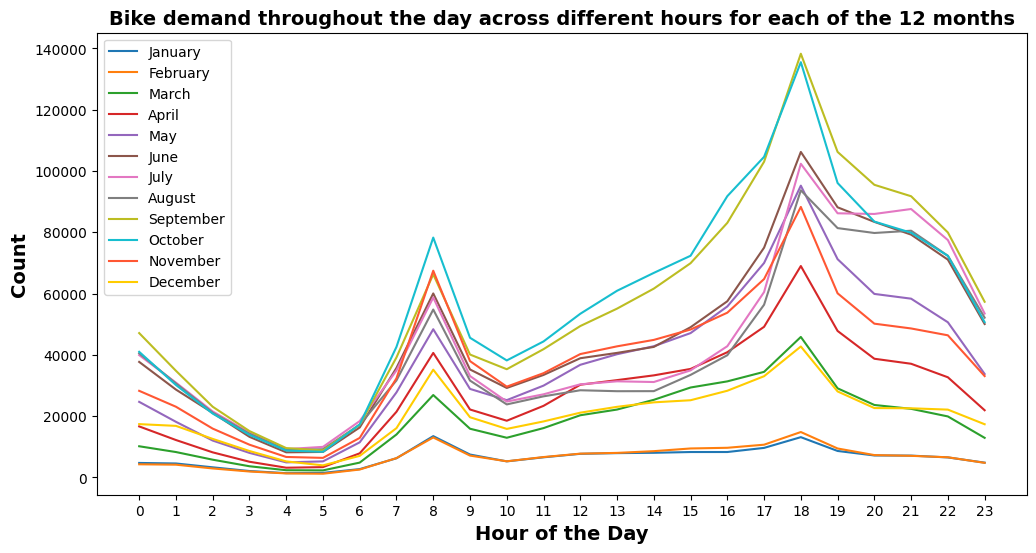

In [ ]:
# GRAPH SHOWING HOW BIKE DEMAND VARIES THROUGHOUT THE DAY ACROSS DIFFERENT HOURS FOR EACH OF THE 12 MONTHS

# grouping the data by month and hour
monthly_hourly_usage = df.groupby(['Pmonth', 'Phour']).size().unstack()

plt.figure(figsize=(12, 6))

# creating list of month names for the legend
month_names = [calendar.month_name[i] for i in range(1, 13)]

# color palette
distinct_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff5733', '#ffcc00']

# plotting separate line for each of the 12 months
for month in range(1, 13):
    monthly_data = monthly_hourly_usage.loc[month]
    plt.plot(monthly_data.index, monthly_data.values, label=month_names[month - 1], color=distinct_colors[month - 1])

plt.xlabel('Hour of the Day', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Bike demand throughout the day across different hours for each of the 12 months', fontsize=14, fontweight='bold')
plt.xticks(range(24))
plt.legend()
plt.show()


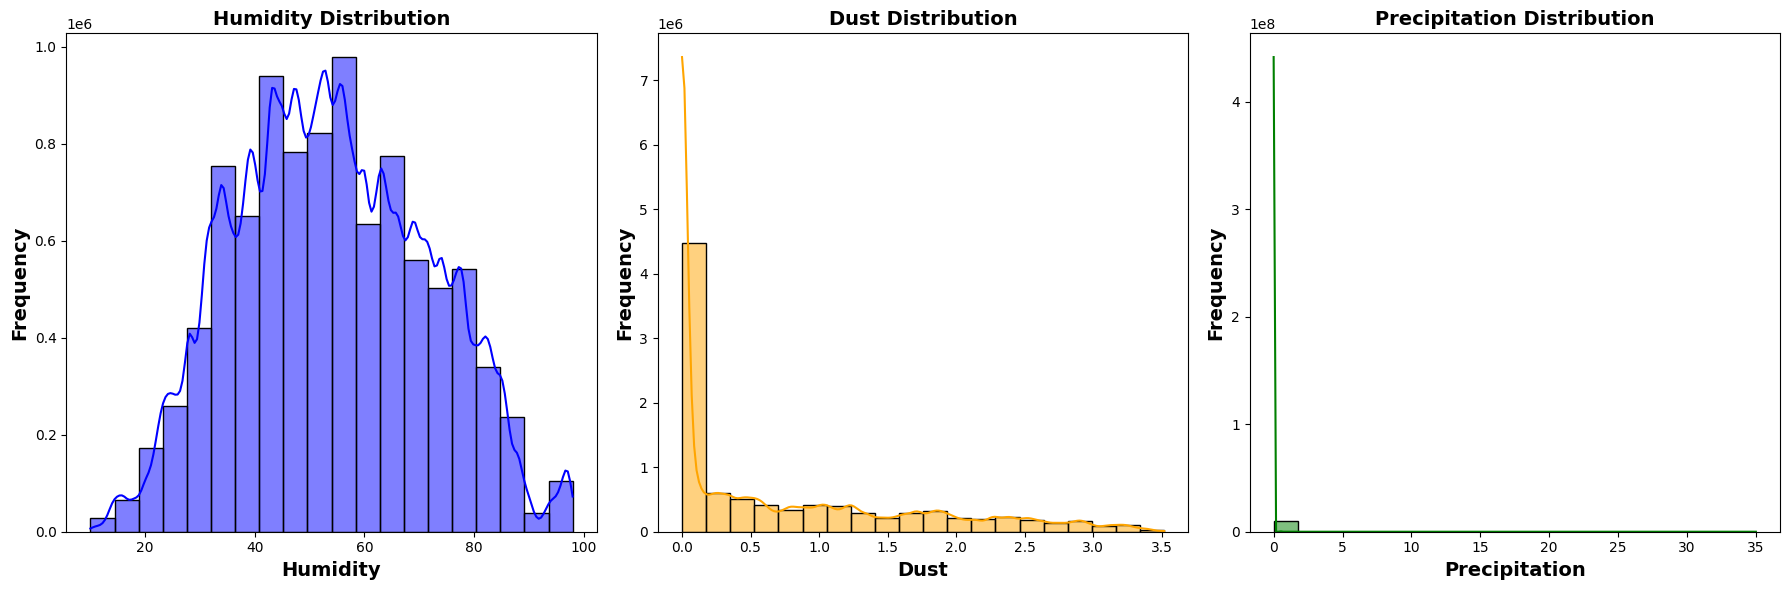

In [ ]:
# DISTRIBUTION OF DIFFERENT WEATHER CONDITIONS

# creating 3 different histograms for humidity, dust and precipitation
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Humid'], bins=20, kde=True, color='blue')
plt.title('Humidity Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Humidity', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 2)
sns.histplot(df['Solar'], bins=20, kde=True, color='orange')
plt.title('Dust Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Dust', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 3)
sns.histplot(df['Precip'], bins=20, kde=True, color='green')
plt.title('Precipitation Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Precipitation', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


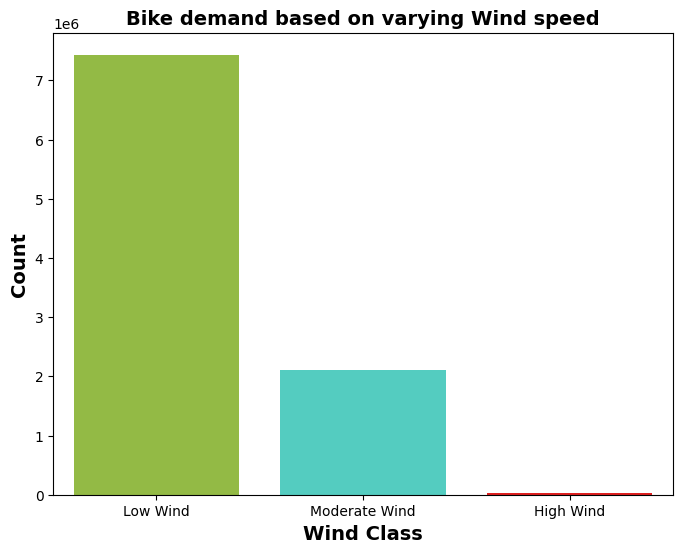

In [ ]:
# GRAPH SHOWNING HOW WIND SPEED AFFECTS THE BIKE DEMAND

#  creating wind labels based on varying wind speeds
wind_ranges = [0, 2.5, 5, 7.4]
wind_labels = ['Low Wind', 'Moderate Wind', 'High Wind']
df['Wind_Class'] = pd.cut(df['Wind'], bins=wind_ranges, labels=wind_labels)


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Wind_Class', palette=['YellowGreen', 'Turquoise', 'Red'], order=wind_labels)
plt.title('Bike demand based on varying Wind speed', fontsize=14, fontweight='bold')
plt.xlabel('Wind Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.show()


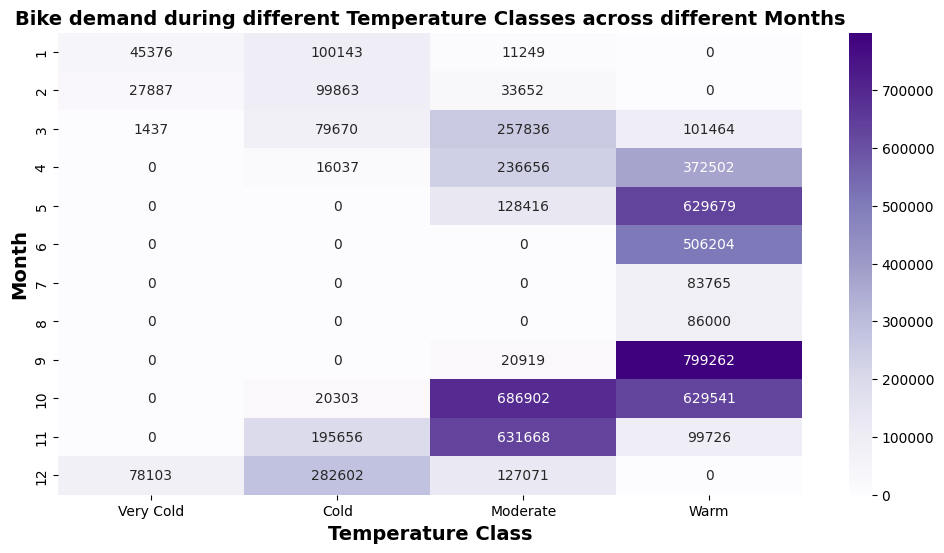

In [ ]:
# GRAPH SHOWING HOW VARIOUS TEMPERATURE CATEGORIES IMPACT BIKE DEMAND ACROSS DIFFERENT MONTHS.

# assigning labels to different temperature ranges
temperature_ranges = [-17.8, -5, 5, 15, 23.7]
temperature_labels = ['Very Cold', 'Cold', 'Moderate', 'Warm']

# categorizing temperatures into classes
df['Temp_Class'] = pd.cut(df['Temp'], bins=temperature_ranges, labels=temperature_labels)

# grouping the data by Pmonth and Temp_Class
grouped = df.groupby(['Pmonth', 'Temp_Class']).size().reset_index(name='Count')

pivot_df = grouped.pivot(index='Pmonth', columns='Temp_Class', values='Count').fillna(0)

# plotting
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_df, annot=True, cmap='Purples', fmt='g', cbar=True)
plt.title('Bike demand during different Temperature Classes across different Months', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Class', fontsize=14, fontweight='bold')
plt.ylabel('Month', fontsize=14, fontweight='bold')
plt.show()


# ML

TASK-2: In our dataset, we have identified two potential regression problems. The first involves predicting the duration for which a bike would be borrowed. The second, which we find more intriguing, focuses on forecasting the demand for bikes at various time intervals, such as by month, weekday, and hour of the day. This problem holds significant practical value for the bike company, as it allows them to gain insights into demand patterns at different times(and possibly different stations), enabling more effective management and resource allocation.

In [ ]:
# Dropping the the unwanted columns since these columns don't affect the our target variable, i.e, demand of bikes
df.drop(columns=['Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek'],inplace = True )

In [ ]:
df.columns

Index(['Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust', 'PLong_updated',
       'PLatd_updated', 'DLong_updated', 'DLatd_updated', 'Wind_Class',
       'Temp_Class'],
      dtype='object')

In [ ]:
df.shape

(9601139, 19)

In [ ]:
# Aggregating the data based on usage in every hour of the day for the specific month

grouped_data = df.groupby(['Pmonth', 'Pday', 'Phour','PDweek']).agg({
    'Temp': 'mean',
    'Precip': 'mean',
    'Wind': 'mean',
    'Humid': 'mean',
    'Solar': 'mean',
    'Snow': 'mean',
    'GroundTemp': 'mean',
    'Dust': 'mean',
}).reset_index()

#count the usage per hour
grouped_data['count'] = df.groupby(['Pmonth', 'Pday', 'Phour','PDweek'])['Pmin'].count().values

print(grouped_data.shape)
grouped_data.head(2)


(8738, 13)


,Pmonth,Pday,Phour,PDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,count
0,1,1,0,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,252
1,1,1,1,0,-3.3,0.0,0.7,41.0,0.0,0.0,-2.7,39.0,284


In [ ]:
df = grouped_data
df.head(2)

,Pmonth,Pday,Phour,PDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,count
0,1,1,0,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,252
1,1,1,1,0,-3.3,0.0,0.7,41.0,0.0,0.0,-2.7,39.0,284


In [ ]:
df.shape

(8738, 13)

In [ ]:
# Splitting the data into train set (75%), validation set (10%) and test set (15%)
x = df.iloc[:,:-1]
y = df['count']

In [ ]:
from sklearn.model_selection import train_test_split
# train-test split
x_train, x_part, y_train, y_part = train_test_split(x,y,test_size = 0.25,random_state = 42)
# test-valid split
x_test, x_valid, y_test, y_valid = train_test_split(x_part,y_part,test_size = 0.25,random_state = 42)

In [ ]:
# Shape of the data considered for the above 3
print(x_train.shape,x_test.shape,x_valid.shape)
print(y_train.shape,y_test.shape,y_valid.shape)

(6553, 12) (1638, 12) (547, 12)
(6553,) (1638,) (547,)


In [ ]:

# Standardize the training set
train_scaler = StandardScaler().fit(x_train)
X_train_scaled = train_scaler.transform(x_train)

# Standardize the validation set using its own statistics
valid_scaler = StandardScaler().fit(x_valid)
X_valid_scaled = valid_scaler.transform(x_valid)

# Standardize the test set using its own statistics
test_scaler = StandardScaler().fit(x_test)
X_test_scaled = test_scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


In [ ]:
# Dictionary of different models with their parameters
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                              "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}},
    'SVM': {"model": SVR(), "params": {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}},  # Add SVM
    'DecisionTreeRegressor': {"model": DecisionTreeRegressor(), "params": {'max_depth': list(range(1, 10, 2))}},  # Add Decision Tree
    'RidgeRegression': {"model": Ridge(), "params": {'alpha': [0.1, 1, 10]}},  # Add Ridge Regression
    'LassoRegression': {"model": Lasso(), "params": {'alpha': [0.1, 1, 10]}}  # Add Lasso Regression
}


In [ ]:
# Evaluation metrics function

def eval_models(X_train_scaled, y_train, X_valid_scaled, y_valid, X_test_scaled, y_test):
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Validation_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Validation_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_valid_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        y_valid_predicted = best_model.predict(X_valid_scaled)
        valid_rmse = np.sqrt(mean_squared_error(list(y_valid), y_valid_predicted))
        valid_mae = mean_absolute_error(list(y_valid), y_valid_predicted)

        y_test_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_test_predicted))
        test_mae = mean_absolute_error(list(y_test), y_test_predicted)

        if valid_rmse < best_valid_score:
            best_valid_score = valid_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Validation_RMSE', 'Test_RMSE', 'Train_MAE', 'Validation_MAE', 'Test_MAE', 'best_params']] = [train_rmse, valid_rmse, test_rmse, train_mae, valid_mae, test_mae, classifier.best_params_]


    return model_results



In [ ]:
#model results
model_results = eval_models(X_train_scaled, y_train, X_valid_scaled, y_valid, X_test_scaled, y_test)

In [ ]:
# Results for the different model
model_results

XGBRegressor

Test RMSE: 250.72
Validation RMSE: 268.36
Train RMSE: 48.35


RandomForestRegressor

Test RMSE: 350.91
Validation RMSE: 372.66
Train RMSE: 310.88


DecisionTreeRegressor

Test RMSE: 438.41
Validation RMSE: 459.79
Train RMSE: 392.50


RidgeRegression

Test RMSE: 741.69
Validation RMSE: 723.81
Train RMSE: 752.83


LassoRegression

Test RMSE: 741.70
Validation RMSE: 723.79
Train RMSE: 752.83


LinearRegression

Test RMSE: 741.67
Validation RMSE: 723.82
Train RMSE: 752.83


SVM (Support Vector Machine)

Test RMSE: 686.65
Validation RMSE: 680.81
Train RMSE: 687.69




So, the best-performing model on the test set is XGBRegressor, followed by RandomForestRegressor, DecisionTreeRegressor, RidgeRegression, LassoRegression, LinearRegression, and SVM. These rankings are based on the RMSE, and lower RMSE values indicate better model performance.